In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [ ]:
# Preparing BMI dataframe

In [ ]:
bmi_df = pd.read_csv('bmi_data.csv')
bmi_df = bmi_df.rename(columns ={'Unnamed: 0' : 'Country', '2016': 'BMI'})
bmi_df = bmi_df.drop(bmi_df.index[[0,1,2]])

In [ ]:
bmi_df = bmi_df.reset_index(drop=True)

In [ ]:
nulls = bmi_df[bmi_df['BMI']=='No data'].index
bmi_df.drop(nulls, inplace=True)

In [ ]:
bmi_df = bmi_df.reset_index(drop=True)
bmi_df

,Country,BMI
0,Afghanistan,23.4 [22.0-24.8]
1,Albania,26.7 [25.8-27.5]
2,Algeria,25.5 [24.5-26.5]
3,Andorra,26.7 [24.6-28.7]
4,Angola,23.3 [21.2-25.6]
...,...,...
186,Venezuela (Bolivarian Republic of),26.7 [26.2-27.2]
187,Viet Nam,21.9 [21.5-22.3]
188,Yemen,23.8 [23.1-24.5]
189,Zambia,22.6 [21.7-23.4]


In [ ]:
all_bmi = []
for x in bmi_df.BMI:
    all_bmi.extend(x.split(' '))

average_bmi =[]
for i in range(len(all_bmi)):
    if (i % 2 == 0):
        average_bmi.append(all_bmi[i])
    final_bmi = [pd.to_numeric(i) for i in average_bmi]


In [ ]:
bmi_df['ALL_BMI'] = final_bmi

In [ ]:
bmi_df.drop(columns='BMI',inplace=True)

In [ ]:
bmi_df.rename(columns ={'ALL_BMI' : 'BMI'})

,Country,BMI
0,Afghanistan,23.4
1,Albania,26.7
2,Algeria,25.5
3,Andorra,26.7
4,Angola,23.3
...,...,...
186,Venezuela (Bolivarian Republic of),26.7
187,Viet Nam,21.9
188,Yemen,23.8
189,Zambia,22.6


In [ ]:
# Preparing Netflix dataframe

In [ ]:
df = pd.read_csv('netflix_titles.csv')
netflix_df = df[['country','listed_in']].copy()
netflix_df.isnull().sum()

country      476
listed_in      0
dtype: int64

In [ ]:
netflix_df = netflix_df.rename(columns ={'country' : 'Country', 'listed_in': 'Genre'})

In [ ]:
netflix_df = netflix_df.dropna()
netflix_df = netflix_df.reset_index(drop=True)
netflix_df

,Country,Genre
0,"United States, India, South Korea, China","Children & Family Movies, Comedies"
1,United Kingdom,Stand-Up Comedy
2,United States,Kids' TV
3,United States,Kids' TV
4,United States,Comedies
...,...,...
5753,Australia,"Kids' TV, TV Comedies"
5754,United States,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
5755,United States,TV Comedies
5756,United Kingdom,"British TV Shows, TV Comedies, TV Dramas"


In [ ]:
top_countries=netflix_df['Country'].value_counts()
top=top_countries[:15] # focus on these countries only
top

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Australia           71
Taiwan              69
Hong Kong           51
China               50
Egypt               50
Name: Country, dtype: int64

In [ ]:
filter1 = netflix_df['Country'].isin(['United States','India','United Kingdom','Japan', 'Canada','South Korea', 'Spain', 'France','Mexico','Turkey','Australia','Taiwan', 'Hong Kong','Egypt','Thailand'])
complete = netflix_df[filter1]
complete

,Country,Genre
1,United Kingdom,Stand-Up Comedy
2,United States,Kids' TV
3,United States,Kids' TV
4,United States,Comedies
5,Spain,"Crime TV Shows, International TV Shows, Spanis..."
...,...,...
5753,Australia,"Kids' TV, TV Comedies"
5754,United States,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
5755,United States,TV Comedies
5756,United Kingdom,"British TV Shows, TV Comedies, TV Dramas"


In [ ]:
netflix_df = complete.reset_index(drop=True)
netflix_df

,Country,Genre
0,United Kingdom,Stand-Up Comedy
1,United States,Kids' TV
2,United States,Kids' TV
3,United States,Comedies
4,Spain,"Crime TV Shows, International TV Shows, Spanis..."
...,...,...
4265,Australia,"Kids' TV, TV Comedies"
4266,United States,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
4267,United States,TV Comedies
4268,United Kingdom,"British TV Shows, TV Comedies, TV Dramas"


In [ ]:
pd.set_option('display.max_rows', 9300)
new_df = pd.DataFrame(netflix_df.Genre.str.split(',').tolist(), index=netflix_df.Country).stack()
new_df = new_df.reset_index([0, 'Country'])
new_df.columns = ['Country','Genre'] # rename columns 
filter2 = new_df['Genre'].isin(['International Movies'])
# gens = new_df[~new_df.Genre.isin(['International Movies'])]
full = new_df[filter2]
al = full.index.values.tolist()
# new_df = new_df.drop(index =al)
drop_rows = new_df[new_df['Genre'].str.contains("International Movies")]
drop_indices = drop_rows.index.values.tolist()
new_df = new_df.drop(index = drop_indices)
new_df

,Country,Genre
0,United Kingdom,Stand-Up Comedy
1,United States,Kids' TV
2,United States,Kids' TV
3,United States,Comedies
4,Spain,Crime TV Shows
5,Spain,International TV Shows
6,Spain,Spanish-Language TV Shows
7,United States,Docuseries
8,United States,Science & Nature TV
9,United States,Comedies


In [ ]:
 # show all rows in dft
genre_df = new_df.groupby(["Country", "Genre"]).size().reset_index(name = "Count") # add new column with the number 
table = genre_df.groupby(["Country", "Genre"]).sum()[['Count']]                    # movies/shows in that genre
#table
genre_df

,Country,Genre,Count
0,Australia,Comedies,2
1,Australia,Documentaries,1
2,Australia,Docuseries,2
3,Australia,Dramas,8
4,Australia,Independent Movies,3
5,Australia,International TV Shows,12
6,Australia,LGBTQ Movies,2
7,Australia,Music & Musicals,2
8,Australia,Reality TV,6
9,Australia,Romantic TV Shows,1


In [ ]:
pd.set_option('display.max_columns', 72) # shows all columns in df; genres are double
genre_table = new_df.pivot_table(index='Country', columns='Genre', aggfunc= 'size', fill_value=0)

genre_table

Genre,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Horror Movies,Independent Movies,International TV Shows,Kids' TV,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,2,0,0,1,2,8,0,0,3,12,0,0,2,2,6,0,1,2,5,0,4,0,0,0,9,13,1,1,0,1,0,3,3,0,0,1,6,0,2,3,8,1,4,6,5,1,0,12,7,3,0,3,0,0,0,0,1,0,0,2,0,0,0,0,1
Canada,0,1,0,0,14,1,3,0,0,1,1,0,12,5,0,1,1,3,5,11,1,4,3,0,4,0,0,2,10,14,3,2,1,3,1,6,8,0,0,0,17,1,0,18,7,0,16,7,14,6,0,12,16,3,0,2,0,0,0,0,2,0,1,3,3,0,1,0,2
Egypt,0,0,0,0,2,0,0,0,0,7,0,0,1,1,0,0,0,2,0,5,2,0,0,0,0,0,0,0,2,6,0,1,1,0,0,2,7,0,0,0,1,0,0,23,1,0,0,0,9,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
France,0,0,0,0,2,0,0,0,2,6,0,0,7,12,0,0,1,1,2,5,2,1,0,0,5,0,0,1,11,18,2,2,0,2,0,2,6,0,0,0,2,0,0,11,11,0,11,2,15,0,0,14,13,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
Hong Kong,0,0,0,0,9,0,2,0,0,6,0,0,2,1,0,0,0,0,0,6,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,1,28,0,0,0,0,0,0,13,1,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
India,0,0,0,3,36,0,4,0,0,183,3,3,111,11,0,0,2,85,2,89,6,10,0,0,12,0,1,4,15,20,6,3,3,3,1,67,118,0,0,0,10,0,9,196,6,0,17,5,323,23,1,36,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0
Japan,32,4,0,1,0,9,0,0,0,1,0,1,0,79,11,0,0,1,4,2,17,6,0,0,0,0,1,3,6,19,1,3,0,4,11,1,34,8,99,0,0,0,0,0,3,0,0,0,2,0,0,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Mexico,0,0,0,0,0,1,0,0,1,7,0,0,9,15,1,0,1,2,0,5,4,2,0,23,1,0,1,1,3,3,0,0,0,0,0,1,2,0,0,0,0,2,1,13,13,0,6,1,12,3,0,11,2,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0
South Korea,0,0,0,0,1,0,0,0,0,8,0,2,1,16,0,103,0,1,2,1,48,2,0,0,0,0,4,5,5,16,0,0,0,0,0,10,12,0,0,0,0,0,0,2,16,0,1,0,12,0,0,80,8,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [ ]:
c = genre_df.groupby(['Country'])['Count'].max()
top_genres = pd.DataFrame(genre_table.idxmax(axis=1))
top_genres

,0
Country,
Australia,TV Dramas
Canada,Comedies
Egypt,Comedies
France,TV Dramas
Hong Kong,Action & Adventure
India,Dramas
Japan,Anime Series
Mexico,Spanish-Language TV Shows
South Korea,Korean TV Shows


In [ ]:
# Merge the BMI and top genre dataframes - this is not used 

In [ ]:
merges = pd.merge(bmi_df, top_genres, on = "Country")

In [ ]:
merges

,Country,ALL_BMI,0
0,Australia,27.1,TV Dramas
1,Canada,26.9,Comedies
2,Egypt,29.6,Comedies
3,France,25.0,TV Dramas
4,India,21.8,Dramas
5,Japan,22.7,Anime Series
6,Mexico,28.0,Spanish-Language TV Shows
7,Spain,25.9,Spanish-Language TV Shows
8,Thailand,24.4,International TV Shows
9,Turkey,27.9,Comedies


In [ ]:
# add happiness data 

In [ ]:
happiness_2016 = '2016.csv'
happiness_2015 = '2015.csv'

h_2016 = pd.read_csv(happiness_2016)
h_2015 = pd.read_csv(happiness_2015)

In [ ]:
# Specify region of the world for which we want to visualize the data
region = ""

In [ ]:
happiness_data = h_2016[['Country', 'Region']].copy()

In [ ]:
happiness_data['Happiness_Score_2016'] = h_2016['Happiness Score']
happiness_data['Happiness_Score_2015'] = h_2015['Happiness Score']
happiness_data['Happiness_Score_Change'] = (happiness_data['Happiness_Score_2016'] - happiness_data['Happiness_Score_2015']) / happiness_data['Happiness_Score_2015'] * 100

In [ ]:
happiness_data['GDP_2016'] = h_2016['Economy (GDP per Capita)']
happiness_data['GDP_2015'] = h_2015['Economy (GDP per Capita)']
happiness_data['GDP_Change'] = (happiness_data['GDP_2016'] - happiness_data['GDP_2015']) / happiness_data['GDP_2015'] * 100

In [ ]:
happiness_data['Life_Expectancy_2016'] = h_2016['Health (Life Expectancy)']
happiness_data['Life_Expectancy_2015'] = h_2015['Health (Life Expectancy)']
happiness_data['Life_Expectancy_Change'] = (happiness_data['Life_Expectancy_2016'] - happiness_data['Life_Expectancy_2015']) / happiness_data['Life_Expectancy_2015'] * 100

In [ ]:
happiness_data

,Country,Region,Happiness_Score_2016,Happiness_Score_2015,Happiness_Score_Change,GDP_2016,GDP_2015,GDP_Change,Life_Expectancy_2016,Life_Expectancy_2015,Life_Expectancy_Change
0,Denmark,Western Europe,7.526,7.587,-0.804007,1.44178,1.39651,3.241652,0.79504,0.94143,-15.549749
1,Switzerland,Western Europe,7.509,7.561,-0.687740,1.52733,1.30232,17.277628,0.86303,0.94784,-8.947713
2,Iceland,Western Europe,7.501,7.527,-0.345423,1.42666,1.32548,7.633461,0.86733,0.87464,-0.835772
3,Norway,Western Europe,7.498,7.522,-0.319064,1.57744,1.45900,8.117889,0.79579,0.88521,-10.101558
4,Finland,Western Europe,7.413,7.427,-0.188501,1.40598,1.32629,6.008490,0.81091,0.90563,-10.459017
5,Canada,North America,7.404,7.406,-0.027005,1.44015,1.29025,11.617904,0.82760,0.88911,-6.918154
6,Netherlands,Western Europe,7.339,7.378,-0.528599,1.46468,1.32944,10.172704,0.81231,0.89284,-9.019533
7,New Zealand,Australia and New Zealand,7.334,7.364,-0.407387,1.36066,1.33171,2.173897,0.83096,0.91087,-8.772931
8,Australia,Australia and New Zealand,7.313,7.286,0.370574,1.44443,1.25018,15.537763,0.85120,0.90837,-6.293691
9,Sweden,Western Europe,7.291,7.284,0.096101,1.45181,1.33358,8.865610,0.83121,0.93156,-10.772253


In [ ]:
# Merge happiness and genres 

In [ ]:
the_df = pd.merge(top_genres, happiness_data, on = 'Country')

In [ ]:
genre_happiness = the_df.rename(columns={0:'Genre'})
genre_happiness

,Country,Genre,Region,Happiness_Score_2016,Happiness_Score_2015,Happiness_Score_Change,GDP_2016,GDP_2015,GDP_Change,Life_Expectancy_2016,Life_Expectancy_2015,Life_Expectancy_Change
0,Australia,TV Dramas,Australia and New Zealand,7.313,7.286,0.370574,1.44443,1.25018,15.537763,0.85120,0.90837,-6.293691
1,Canada,Comedies,North America,7.404,7.406,-0.027005,1.44015,1.29025,11.617904,0.82760,0.88911,-6.918154
2,Egypt,Comedies,Middle East and Northern Africa,4.362,4.517,-3.431481,0.95395,0.00000,inf,0.52116,0.09806,431.470528
3,France,TV Dramas,Western Europe,6.478,6.485,-0.107941,1.39488,1.06166,31.386696,0.83795,0.81160,3.246673
4,Hong Kong,Action & Adventure,Eastern Asia,5.458,5.360,1.828358,1.51070,0.63216,138.974310,0.95277,0.74676,27.587177
5,India,Dramas,Southern Asia,4.404,4.550,-3.208791,0.74036,0.52107,42.084557,0.45091,0.36878,22.270731
6,Japan,Anime Series,Eastern Asia,5.921,5.878,0.731541,1.38007,0.75985,81.624005,0.91491,0.66098,38.417199
7,Mexico,Spanish-Language TV Shows,Latin America and Caribbean,6.778,6.867,-1.296054,1.11508,1.26637,-11.946745,0.71143,0.90943,-21.771879
8,South Korea,Korean TV Shows,Eastern Asia,5.835,5.824,0.188874,1.35948,0.90019,51.021451,0.88645,0.73017,21.403235
9,Spain,Spanish-Language TV Shows,Western Europe,6.361,6.302,0.936211,1.34253,1.20740,11.191817,0.87896,0.88721,-0.929881


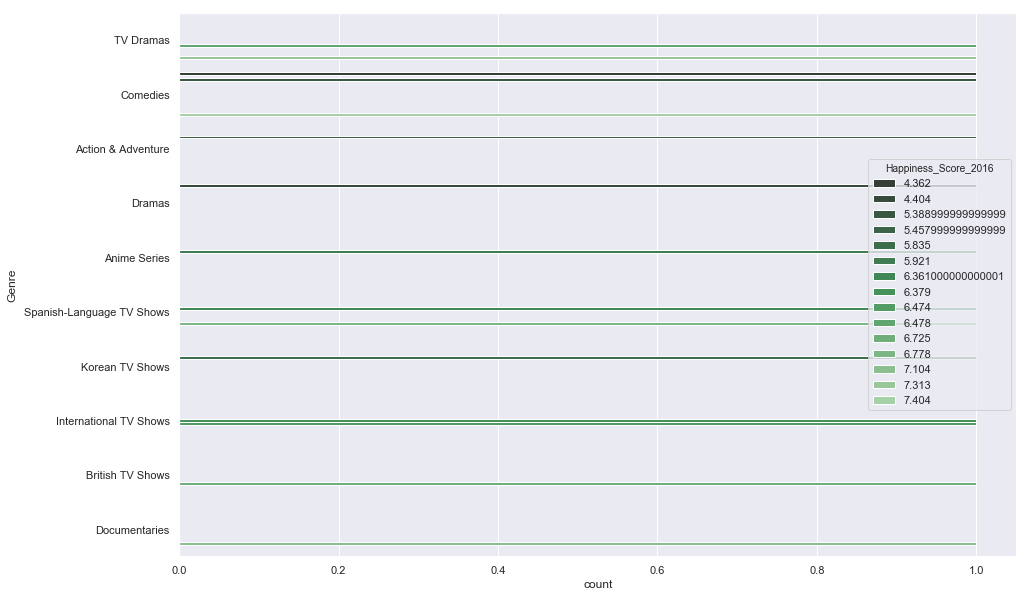

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(y='Genre', hue='Happiness_Score_2016', data=genre_happiness, palette="Greens_d") # not used

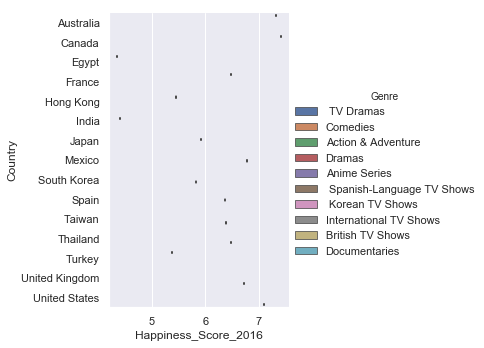

In [ ]:
sns.catplot(x="Happiness_Score_2016", y="Country", hue="Genre", kind="box", data=genre_happiness); # not used

Text(0.5, 1.0, 'Happiness Score and Top Genre per country')

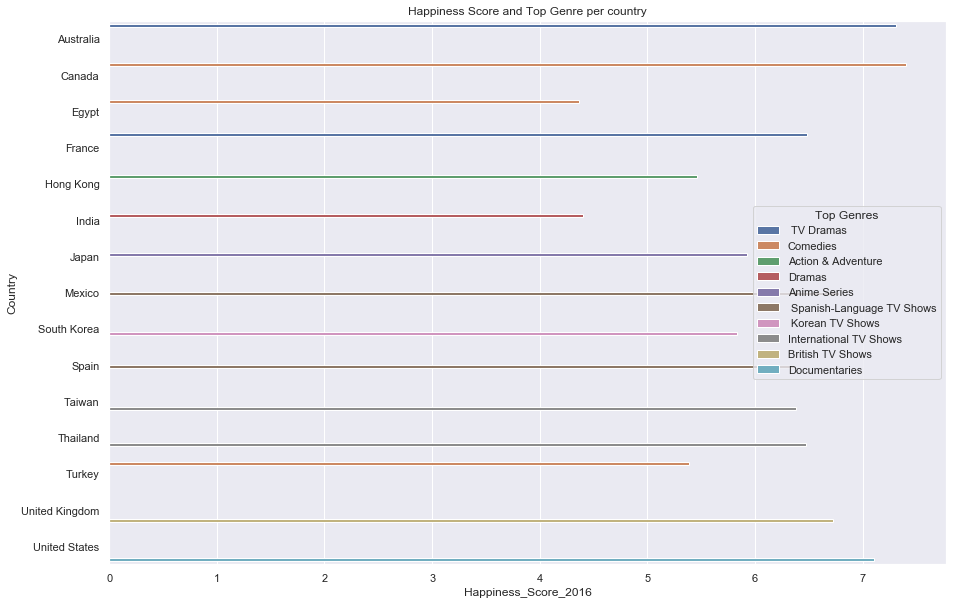

In [ ]:
# this plot was used in presentation
plot = sns.barplot(x='Happiness_Score_2016', y='Country', hue='Genre', data=genre_happiness, orient='h')
plt.legend(title='Top Genres')
plt.title('Happiness Score and Top Genre per country') 